In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
data_path = os.path.join('..','..','1_Data','Cleaned Data','data_cleaned.csv')
output_path = 'data'
df = pd.read_csv(data_path)


In [5]:
in_match_player_features = ['assists','boosts','damageDealt','DBNOs','headshotKills',
                           'killPlace','killPoints','kills','killStreaks','longestKill',
                           'revives','rideDistance','roadKills','swimDistance','roadKills',
                            'swimDistance','teamKills','vehicleDestroys','walkDistance',
                            'weaponsAcquired']

prediction_feature = ['winPlacePerc']

global_player_features = ['killPoints','winPoints','rankPoints']

match_features = ['groupId','matchId','matchDuration']

### Data Correlation

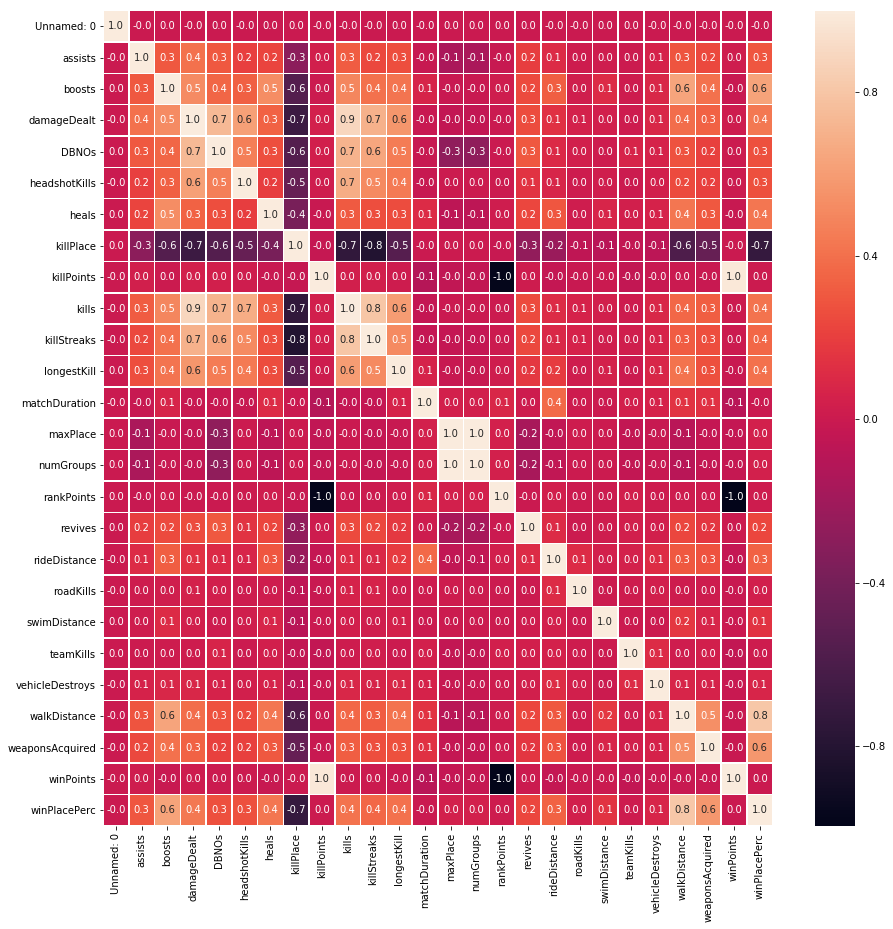

In [5]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

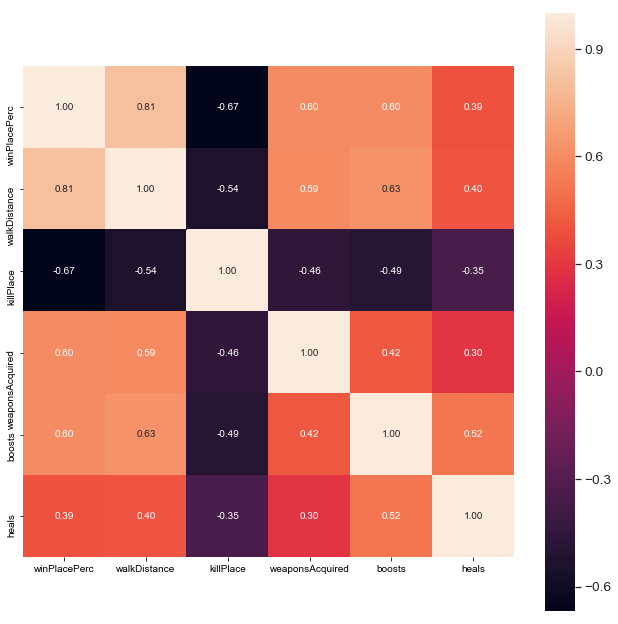

In [7]:
k = 6 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
most_cor_cols = df.corr().abs().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(df[most_cor_cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=most_cor_cols.values, xticklabels=most_cor_cols.values)
plt.show()

### Creating the models

In [8]:
most_cor_cols = most_cor_cols.drop(prediction_feature)

#### Linear Regression - no polynomial

In [9]:
kf = KFold(n_splits=10)

X = df[most_cor_cols] 
y = df[prediction_feature]

results_linear = {}

for k, (train, test) in enumerate(kf.split(X, y)):
    reg = LinearRegression(n_jobs=6)
#     print(X.iloc[train].head(2))
    reg.fit(X.iloc[train], y.iloc[train])
    
    y_pred = reg.predict(X.iloc[test])
    y_true =  y.iloc[test]
    rmse = mean_squared_error(y_true, y_pred)
    r2 = reg.score(X.iloc[test], y.iloc[test])
    
    results_linear['fold '+str(k)] = {'coef':reg.coef_,'rmse':rmse,'r2':r2}
    
    print("[fold {0}] coef {1} RMSE {2:.5f} R2: {3:.5f}".
          format(k,reg.coef_,rmse,r2))

[fold 0] coef [[ 0.00014966 -0.00321617  0.01570704  0.01355158  0.00124958]] RMSE 0.02118 R2: 0.74143
[fold 1] coef [[ 0.00014964 -0.0032166   0.01572448  0.01346983  0.00128514]] RMSE 0.02110 R2: 0.74279
[fold 2] coef [[ 0.00014966 -0.00321624  0.01571395  0.01353365  0.00127825]] RMSE 0.02118 R2: 0.74147
[fold 3] coef [[ 0.00014963 -0.00321681  0.01573368  0.01354189  0.00126119]] RMSE 0.02118 R2: 0.74119
[fold 4] coef [[ 0.00014955 -0.00322001  0.01571893  0.01351582  0.00126077]] RMSE 0.02120 R2: 0.74104
[fold 5] coef [[ 0.00014962 -0.00321571  0.01575361  0.01356636  0.00124176]] RMSE 0.02110 R2: 0.74218
[fold 6] coef [[ 0.00014965 -0.00321538  0.01576     0.01348106  0.00126684]] RMSE 0.02121 R2: 0.74118
[fold 7] coef [[ 0.00014958 -0.00321628  0.01575785  0.01354029  0.00129116]] RMSE 0.02116 R2: 0.74106
[fold 8] coef [[ 0.00014963 -0.00321695  0.01570381  0.01353419  0.0012612 ]] RMSE 0.02106 R2: 0.74316
[fold 9] coef [[ 0.00014962 -0.00321538  0.01573525  0.0135188   0.001240

#### Linear Regression - polynomial 2

In [10]:
kf = KFold(n_splits=10)

X = df[most_cor_cols] 
y = df[prediction_feature]

results_pol2 = {}

for k, (train, test) in enumerate(kf.split(X, y)):
    reg = make_pipeline(PolynomialFeatures(2), LinearRegression())
#     print(X.iloc[train].head(2))
    reg.fit(X.iloc[train], y.iloc[train])
    
    y_pred = reg.predict(X.iloc[test])
    y_true =  y.iloc[test]
    rmse = mean_squared_error(y_true, y_pred)
    r2 = reg.score(X.iloc[test], y.iloc[test])
    
    results_pol2['fold '+str(k)] = {'coef':reg.steps[1][1].coef_,'rmse':rmse,'r2':r2}
    
    print("[fold {0}] coef {1} RMSE {2:.5f} R2: {3:.5f}".
          format(k,reg.steps[1][1].coef_,rmse,r2))

[fold 0] coef [[ 0.00000000e+00  3.71222161e-04  1.17378811e-02  2.22726371e-02
   3.69564247e-02  7.89522323e-03 -3.82492048e-08 -1.98097046e-06
  -3.61448073e-06 -3.73963769e-06 -2.28008628e-06 -1.22353458e-04
  -2.56689018e-04 -1.94327039e-04 -2.58889875e-05  7.76638468e-06
  -1.02133444e-03 -2.98367594e-04 -3.71197348e-05 -3.26108228e-04
   4.33580439e-05]] RMSE 0.01682 R2: 0.79468
[fold 1] coef [[ 0.00000000e+00  3.71386486e-04  1.17613849e-02  2.24992598e-02
   3.71888995e-02  7.88730184e-03 -3.83046113e-08 -1.98408131e-06
  -3.59928260e-06 -3.77366126e-06 -2.26510290e-06 -1.22492245e-04
  -2.58849196e-04 -1.96492103e-04 -2.43943952e-05 -4.28830705e-06
  -1.04833146e-03 -3.11764154e-04 -4.08922002e-05 -3.24017224e-04
   4.49504519e-05]] RMSE 0.01677 R2: 0.79551
[fold 2] coef [[ 0.00000000e+00  3.71630536e-04  1.17443315e-02  2.23481300e-02
   3.68682142e-02  7.82367821e-03 -3.83040542e-08 -1.98676165e-06
  -3.62402265e-06 -3.74895876e-06 -2.27014115e-06 -1.22382403e-04
  -2.56415

#### Linear Regression - polynomial 5

In [ ]:
kf = KFold(n_splits=10)

X = df[most_cor_cols] 
y = df[prediction_feature]

results_pol5 = {}

for k, (train, test) in enumerate(kf.split(X, y)):
    reg = make_pipeline(PolynomialFeatures(5), LinearRegression())
#     print(X.iloc[train].head(2))
    reg.fit(X.iloc[train], y.iloc[train])
    
    y_pred = reg.predict(X.iloc[test])
    y_true =  y.iloc[test]
    rmse = mean_squared_error(y_true, y_pred)
    r2 = reg.score(X.iloc[test], y.iloc[test])
    
    results_pol5['fold '+str(k)] = {'coef':reg.steps[1][1].coef_,'rmse':rmse,'r2':r2}
    
    print("[fold {0}] coef {1} RMSE {2:.5f} R2: {3:.5f}".
          format(k,reg.steps[1][1].coef_,rmse,r2))

[fold 0] coef [[ 1.10336677e-06  1.13185351e-04 -1.95818715e-06  2.42187036e-06
   4.68322587e-07  5.10871041e-07 -4.58788478e-07 -1.04346501e-05
   3.49214166e-04  4.95040813e-05  3.88152190e-05 -9.28137375e-05
  -2.33378601e-06 -1.26215023e-07  9.53482364e-07  2.04875344e-06
   4.17401159e-07  6.16966972e-07  2.11801544e-07 -8.70949656e-09
   4.07928322e-07  3.62329610e-10 -2.43856631e-09 -1.07788481e-07
  -1.75195681e-08 -1.66571309e-08  9.69901473e-07 -1.33591577e-06
   1.79112756e-06 -6.21023502e-07 -4.91789581e-05 -1.29954514e-05
  -7.78716812e-06  6.37347526e-06 -2.18627974e-06  5.62054679e-09
   1.21963925e-05 -1.17360495e-04  6.81716113e-06  8.71321629e-07
  -9.03911986e-06 -3.12348574e-06 -7.75912608e-07 -9.58842975e-07
   5.05368285e-07 -4.27988219e-07  2.36758974e-06 -7.72099934e-07
  -9.53689281e-08  2.78126306e-08 -5.70454518e-08  1.17924980e-06
   1.90886326e-07  3.73068351e-08 -1.64046198e-07  1.47120552e-06
  -8.86144814e-14  4.20344472e-13  3.83042902e-12  4.98950900e

#### Ridge Regression - polynomial 5

In [15]:
kf = KFold(n_splits=10)

X = df[most_cor_cols] 
y = df[prediction_feature]

results_pol5_reg = {}

for k, (train, test) in enumerate(kf.split(X, y)):
    reg = make_pipeline(PolynomialFeatures(5), Ridge(alpha=0.01))
#     print(X.iloc[train].head(2))
    reg.fit(X.iloc[train], y.iloc[train])
    
    y_pred = reg.predict(X.iloc[test])
    y_true =  y.iloc[test]
    rmse = mean_squared_error(y_true, y_pred)
    r2 = reg.score(X.iloc[test], y.iloc[test])
    
    results_pol5_reg['fold '+str(k)] = {'coef':reg.steps[1][1].coef_,'rmse':rmse,'r2':r2}
    
    print("[fold {0}] coef {1} RMSE {2:.5f} R2: {3:.5f}".
          format(k,reg.steps[1][1].coef_,rmse,r2))

[fold 0] coef [[ 0.00000000e+00  5.89622597e-04  4.76245328e-02 -5.14357880e-02
   5.68249456e-03  1.68427175e-02 -2.47688626e-07 -2.28636847e-05
   9.82800852e-06  5.87893759e-06 -2.14232034e-05 -3.19759823e-03
  -7.30070808e-03  4.09080159e-03  4.61264294e-04  5.60689590e-02
  -1.10634660e-02 -1.36361839e-04  6.77253255e-03 -2.72574085e-04
  -1.77165308e-03  1.20005126e-10 -1.35928247e-09 -5.68843110e-09
  -2.73107766e-08  6.15109854e-09  1.40586956e-06  1.25725090e-06
   2.90583524e-07  1.56726450e-07 -7.64636758e-06  6.63152926e-06
   8.67606480e-07  1.04142428e-05  9.95466418e-07  1.20788107e-06
   8.68211091e-05  2.31127257e-04 -1.70846789e-04 -1.40982696e-05
   4.76994276e-04  3.05244172e-04 -5.16164340e-06 -8.72336930e-04
  -1.15136646e-04 -2.55988467e-05 -1.17755281e-02  7.64280783e-04
  -7.53392684e-04  9.48150760e-05  4.07897698e-04  1.53122619e-04
  -1.31465916e-03 -5.78283300e-04  1.52538626e-04  8.58959236e-05
  -2.87764074e-14  4.51524317e-13  3.27470099e-14  8.40668228e